# **Clasificacion y metricas de evaluacion**

In [1]:
## IMPORTAR LIBRERIAS DE TRABAJO

# mate
import numpy as np

# modelos
import sklearn

# trabajo con tablas
import pandas as pd

# data externa
from sklearn.datasets import fetch_openml

# interfaz con sistema operativo
import os

# graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# semilla para que los resultados sean reproducibles
np.random.seed(42)

# **Cargar la data MNIST**
Para mas contexto sobre la data ir al siguiente [link](https://conx.readthedocs.io/en/latest/MNIST.html).

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# revisar data de entrenamiento
X = mnist["data"]
print(X.shape)
print(type(X))

(70000, 784)
<class 'numpy.ndarray'>


In [5]:
# convirtamos X a dataframe para inspeccionar mejor
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Inspeccionemos que valores toman los pixeles del primer digito (la primera fila):

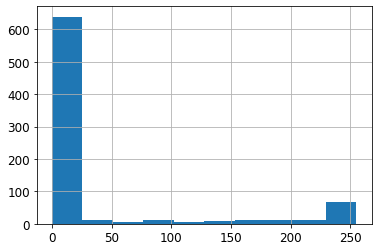

In [6]:
X_df.iloc[0,:].hist(bins=10)

In [7]:
# revisar el target
y = mnist["target"]
print(y.shape)
print(type(y))

(70000,)
<class 'numpy.ndarray'>


Como ejemplo, reconstruyamos graficamente el primer digito (primera fila) a partir de los valores de cada una de sus columnas.

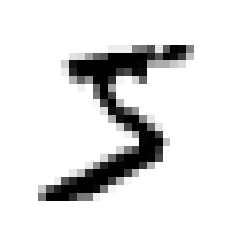

In [8]:
# plot de uno de los digitos
primer_digito = X[0]
primer_digito_imagen = primer_digito.reshape(28, 28)
plt.imshow(primer_digito_imagen, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

Confirmemos lo que dice la variable `y` para este primer digito:

In [9]:
primer_label = y[0]
print(primer_label)

5


Todo OK!

In [10]:
# convertir y a un formato mas eficiente
y = y.astype(np.uint8)

# **Entrenar modelos que encuentren los 5**

- Este es un problema de clasificacion. 
- Es un caso binario porque el target es categorico y solo toma dos valores --cada observacion es un cinco, o no lo es--.

Empezamos por definir las muestras de training y testing.

In [11]:
# Definir data de training y testing
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

- Los valores de `y` van del 1 al 9. Pero solo nos interesa saber si el digito es un 5 o no.

- Lo siguiente sera generar el vector con el ***target*** (La variable a predecir). Debera tener valor `True` siempre que `y` sea igual a 5 y `False` cuando no.

- Las variables que toman valor `True` cuando se cumple cierta condicion se conocen como *flag* o *dummy*.

- **Nota:** (Para Python `True`=1 y `False`=0)

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
print(y_train_5)

[ True False False ...  True False False]


## **Probar un modelo SGD**

In [14]:
# importar el algoritmo
from sklearn.linear_model import SGDClassifier

# Definir sus hiperparametros
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# entrenar el modelo
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Veamos que predice el modelo para el primer digito (usamos el metodo `predict`):

In [15]:
primer_digito = X[0]
sgd_clf.predict([primer_digito])

array([ True])

`True`, el modelo predijo que es un 5! ⭐️

Veamos el performance de la metrica `accuracy` (el numero de aciertos totales) con validacion cruzada.

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Todo parece estar bien ... verdad?

## **Probar un modelo Naive**
Crearemos manualmente un modelo trivial que siempre predecira (ingenuamente) que un digito no es 5.

In [17]:
from sklearn.base import BaseEstimator
class ClasificadorNunca5(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

nunca_5_clf = ClasificadorNunca5()
cross_val_score(nunca_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Un clasificador aparentemente tan malo tiene una precision tremenda. Por que?

In [18]:
# recordar cuantos digitos tenemos en la data de entrenamiento
print(len(y_train_5))

60000


In [19]:
# cuantos de estos son 5
print(y_train_5.sum())

5421


Solo el 10% de las observaciones son 5, asi que si siempre predigo que el digito no es 5, acertare el 90% de las veces. 🙀

# **Analizar mas a fondo el performance de un clasificador**

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## **Matriz de confusion**

Primero veamos el ideal. Cual seria la matriz de confusion de un modelo que acierta perfectamente.

In [21]:
y_train_perfect_predictions = y_train_5 
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [22]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## **Precision**
*Precision* es la proporcion de observaciones que nuestro modelo predijo correctamente como `5` del total predicciones correctas e incorrectas.

In [24]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

Tambien se puede calcular el precison a partir de la matriz de confusion:

In [25]:
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


In [26]:
# calcular precision
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

## **Recall**
*Recall* es la proporcion de observaciones que nuestro modelo predijo como `5`, sobre la cantidad real de `5`s en la data.

In [27]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Tambien se puede calcular el *recall* a partir de la matriz de confusion:

In [28]:
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


In [29]:
# calcular recall
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

## **Umbrales de decision y el trade-off Precission-Recall**

- La prediccion en un modelo de clasificacion consiste en asignar un score a las observaciones sobre las que se esta prediciendo (*scoring*).
- Cuando la prediccion una observacion sobrepasa cierto umbral de decision (*threshold*) se asigna el label correspondiente (`True` o 1 en un problema binario).
- El umbral puede ser modificado por el analista. De hecho, el umbral depende de nuestra sensibilidad frente a falsos positivos o negativos.

En un modelo SGD el umbral de decision es 0. Cuando una observacion tiene un `score` mayor que 0, se considera un positivo (`True` en nuestro caso). 

Veamos el score del primer digito que ya habiamos guardado en la variable `primer_digito`. Para obtener el score de un m,modelo de scikitlearn, usamos el metodo `decision_function()`.

In [30]:
y_score = sgd_clf.decision_function([primer_digito])
y_score

array([2164.22030239])

Efectivamente el score es mayor que cero. Por eso se le asigno el label `True`.

Que pasa si modificamos el *threshold*? Primero partamos del original, es decir 0.

In [31]:
threshold = 0
primer_digito_pred = (y_score > threshold)
primer_digito_pred

array([ True])

Ahora cambiemos el threshold a 8000, cual seria la prediccion?

In [32]:
threshold = 8000
primer_digito_pred = (y_score > threshold)
primer_digito_pred

array([False])

Como saber que umbral es mejor usar? Primero calculemos el *score* de todas nuestras observaciones.

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Ahora graficaremos el **recall** y **precision** para distintos valores del **threshold**.

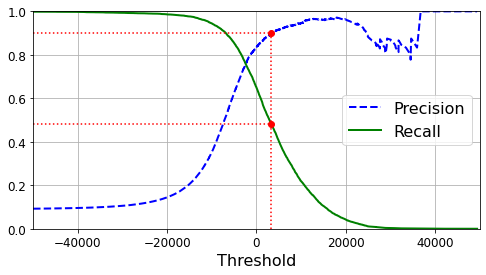

In [34]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                        
plt.show()

Otra forma de evidenciar el *trade-off* es graficando *precision* vs *recall*:

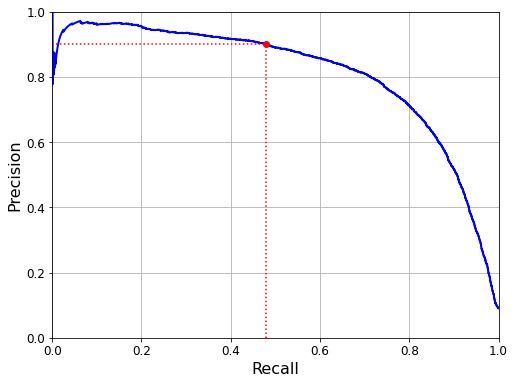

In [35]:
(y_train_pred == (y_scores > 0)).all()

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()